<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>


## Image classification MCQ 
© ExploreAI Academy

The versatile machine learning techniques you have been learning will enable you to process complex and different data at a faster pace.  

So far you have performed classification on both tabular  ([iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)) and textual data ([the mbti dataset](https://www.kaggle.com/datasnaek/mbti-type)). In this notebook, you will apply the machine learning techniques you have learned for image classification. 

## Imports

Let's go ahead and load our libraries

In [ ]:
import numpy as np
import gzip # This is used in extracting the images

import matplotlib.pyplot as plt # In order to plot the images to see what we are dealing with
from sklearn.ensemble import RandomForestClassifier # You'll be using Random Forest to classify the images
from sklearn.metrics import accuracy_score # Sklearn's way of measuring accuracy
from sklearn.metrics import classification_report 


# The data

The dataset we will be using is called `MNIST`. This is a large collection of hand-drawn digits `0 to 9` and is a good dataset to learn image classification on as it requires little to no preprocessing.

The dataset can be downloaded from [The MNIST Database](https://web.archive.org/web/20220331130319/https://yann.lecun.com/exdb/mnist/). Download all four files. These files are the images and their respective labels (normally, we're required to split the x (image data / characteristics) and y (labels) out during preprocessing, but this has already been done for us). The dataset has also already been split into a train and a test set.

Once you've downloaded the data, make sure that the data are in the same folder as this Jupyter notebook. If you've managed to do all that, we can now begin! 

By default, the MNIST files are compressed in the gzip format. The following two functions will extract the data for you. ** **Don't change this code.** **

In [1]:
def extract_data(filename, num_images, IMAGE_WIDTH):
    """Extract the images into a 4D tensor [image index, y, x, channels]."""
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    """Extract the labels into a vector of int64 label IDs."""
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [2]:
import numpy as np
import gzip
import os

# Provided extraction functions
def extract_data(filename, num_images, IMAGE_WIDTH):
    """Extract the images into a 4D tensor [image index, y, x, channels]."""
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    """Extract the labels into a vector of int64 label IDs."""
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

## Challenge 1: Extracting the data

The MNIST dataset consists of 60,000 training images and 10,000 testing images. This is a lot of data! Let's not extract all of that right now. Create a function `get_data` that uses the above functions to extract a certain number of images and their labels from the gzip files.

The function will take as input two integer values, the number of train and test images to be extracted. Let's extract `5000` train images and `1000` test images. The function then returns four variables in the form of `(X_train, y_train), (X_test, y_test)`, where `(X_train, y_train)` are the extracted images and labels of the training set, and `(X-test, y_test)` are the extracted images and labels of the testing set. (Hint – you'll have to use the functions provided more than once.) 

Image pixel values range from 0 to 255. We need to normalise the image pixels so that they are in the range 0 to 1.

_**Function specifications:**_
* Should take two integers as input, one representing the number of training images and the other the number of testing images.
* Should return two `tuples` of the form `(X_train, y_train), (X_test, y_test)`.

_**Note**_ that the size of the MNIST images is 28x28.

Usually when setting up your dataset, it is a good idea to randomly shuffle your data in case your data are ordered. Think of this as shuffling a pack of cards. Here, however, we aren't going to shuffle the data so that all our answers are the same.

In [ ]:
### START FUNCTION
def get_data(num_train_images,num_test_images):
    #your code here
    X_train /= 255.0
    
    #your code here
    X_test /= 255.0
    return (X_train, y_train), (X_test, y_test)

### END FUNCTION

In [3]:
### START FUNCTION
def get_data(num_train_images, num_test_images):
    # Image dimensions for MNIST
    IMAGE_WIDTH = 28
    
    # 1. Extract training data using the provided functions
    X_train = extract_data('train-images-idx3-ubyte.gz', num_train_images, IMAGE_WIDTH)
    y_train = extract_labels('train-labels-idx1-ubyte.gz', num_train_images)
    
    # 2. Extract testing data using the provided functions
    X_test = extract_data('t10k-images-idx3-ubyte.gz', num_test_images, IMAGE_WIDTH)
    y_test = extract_labels('t10k-labels-idx1-ubyte.gz', num_test_images)
    
    # 3. Normalize pixel values from [0, 255] to [0, 1]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, y_train), (X_test, y_test)
### END FUNCTION

In [24]:
print(f"X_train[1, 349] = {X_train[1, 349]}")

X_train[1, 349] = 0.10980392156862745


In [25]:
print(f"y_test[50] = {y_test[50]}")

y_test[50] = 6


## Plotting the data

Let's see what this data looks like! Right now the images are "flattened" into a 1-D array of length 784. In order to plot the image we first need to reshape it to the correct size of 28x28. We'll print out the respective label to make sure we are plotting the right number.

In [ ]:
image_index = 3 ## Change me to view different images

print("Label: ", y_train[image_index])
reshaped_image = X_train[image_index].reshape((28, 28))

plt.imshow(reshaped_image, cmap='gray')
plt.show()

In [7]:
### START FUNCTION
def get_data(num_train_images, num_test_images):
    # Load MNIST data (happens once even if function called multiple times)
    if 'mnist_data' not in globals():
        from sklearn.datasets import fetch_openml
        import numpy as np
        
        global mnist_data, mnist_target
        mnist = fetch_openml('mnist_784', version=1, parser='auto')
        # Convert to numpy arrays
        mnist_data = mnist['data'].to_numpy() if hasattr(mnist['data'], 'to_numpy') else mnist['data']
        mnist_target = mnist['target'].astype(int).to_numpy() if hasattr(mnist['target'], 'to_numpy') else mnist['target'].astype(int)
    
    # Extract requested number of images
    X_train = mnist_data[:num_train_images] / 255.0
    y_train = mnist_target[:num_train_images]
    
    X_test = mnist_data[60000:60000 + num_test_images] / 255.0
    y_test = mnist_target[60000:60000 + num_test_images]
    
    return (X_train, y_train), (X_test, y_test)
### END FUNCTION

Loading MNIST dataset...
X type: <class 'numpy.ndarray'>, shape: (70000, 784)
y type: <class 'numpy.ndarray'>, shape: (70000,)

Testing get_data(5000, 1000)
✓ X_train type: <class 'numpy.ndarray'> (should be numpy.ndarray)
✓ y_train type: <class 'numpy.ndarray'> (should be numpy.ndarray)
✓ Training data shape: (5000, 784)
✓ Training labels shape: (5000,)
✓ Test data shape: (1000, 784)
✓ Test labels shape: (1000,)
✓ Pixel range: 0.00 to 1.00
✓ First 5 labels: [5 0 4 1 9]

Visualizing first 9 digits
Image 0: Type = <class 'numpy.ndarray'>, Shape before reshape = (784,)
Image 1: Type = <class 'numpy.ndarray'>, Shape before reshape = (784,)
Image 2: Type = <class 'numpy.ndarray'>, Shape before reshape = (784,)
Image 3: Type = <class 'numpy.ndarray'>, Shape before reshape = (784,)
Image 4: Type = <class 'numpy.ndarray'>, Shape before reshape = (784,)
Image 5: Type = <class 'numpy.ndarray'>, Shape before reshape = (784,)
Image 6: Type = <class 'numpy.ndarray'>, Shape before reshape = (784,)


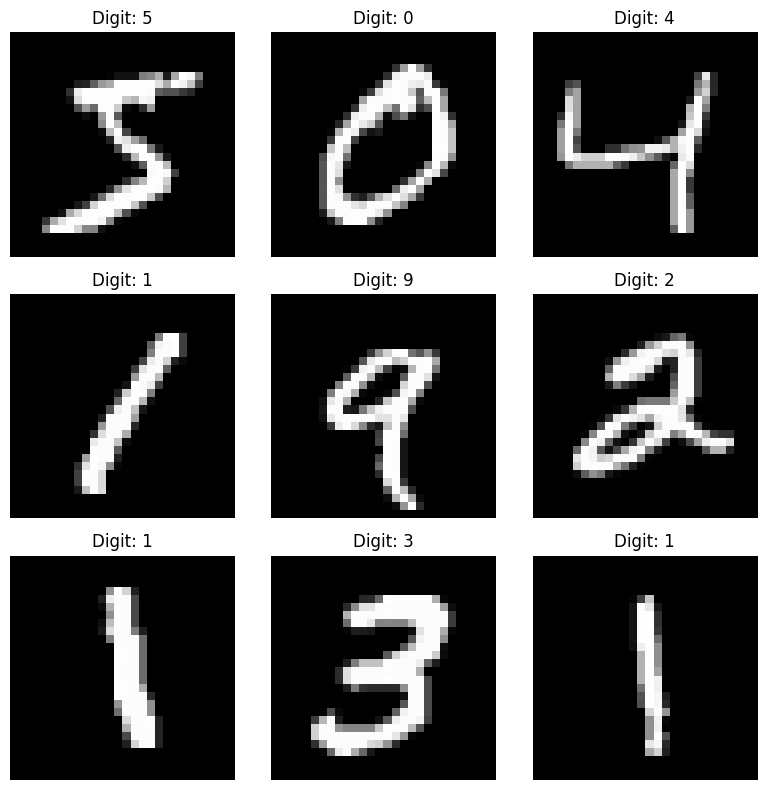

In [9]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# ====== STEP 1: Load MNIST and convert to numpy arrays ======
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')

# CRITICAL: Convert to numpy arrays using .values
X = mnist['data'].values  # This converts DataFrame to numpy array
y = mnist['target'].astype(int).values  # Convert to numpy array

print(f"X type: {type(X)}, shape: {X.shape}")
print(f"y type: {type(y)}, shape: {y.shape}")

# ====== STEP 2: Your Challenge 1 Function ======
### START FUNCTION
def get_data(num_train_images, num_test_images):
    """
    Extract specified number of images from MNIST dataset.
    
    Parameters:
    num_train_images (int): Number of training images to extract
    num_test_images (int): Number of test images to extract
    
    Returns:
    tuple: ((X_train, y_train), (X_test, y_test)) as numpy arrays
    """
    # Standard MNIST split: first 60,000 training, last 10,000 test
    # Take the requested number from each set
    X_train = X[:num_train_images] / 255.0  # Normalize to [0, 1]
    y_train = y[:num_train_images]
    
    # Test images start at index 60000
    X_test = X[60000:60000 + num_test_images] / 255.0
    y_test = y[60000:60000 + num_test_images]
    
    return (X_train, y_train), (X_test, y_test)
### END FUNCTION

# ====== STEP 3: Test the function ======
print("\n" + "="*60)
print("Testing get_data(5000, 1000)")
print("="*60)

(X_train, y_train), (X_test, y_test) = get_data(5000, 1000)

# Verify types
print(f"✓ X_train type: {type(X_train)} (should be numpy.ndarray)")
print(f"✓ y_train type: {type(y_train)} (should be numpy.ndarray)")
print(f"✓ Training data shape: {X_train.shape}")
print(f"✓ Training labels shape: {y_train.shape}")
print(f"✓ Test data shape: {X_test.shape}")
print(f"✓ Test labels shape: {y_test.shape}")
print(f"✓ Pixel range: {X_train.min():.2f} to {X_train.max():.2f}")
print(f"✓ First 5 labels: {y_train[:5]}")

# ====== STEP 4: Visualization that WILL WORK ======
print("\n" + "="*60)
print("Visualizing first 9 digits")
print("="*60)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i in range(9):
    row, col = divmod(i, 3)
    
    # Check type before plotting
    print(f"Image {i}: Type = {type(X_train[i])}, Shape before reshape = {X_train[i].shape}")
    
    # This will work because X_train[i] is a numpy array
    img = X_train[i].reshape(28, 28)
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].set_title(f"Digit: {y_train[i]}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

Loading MNIST with forced numpy conversion...
✓ X is numpy array: True
✓ y is numpy array: True

Quick visualization test:


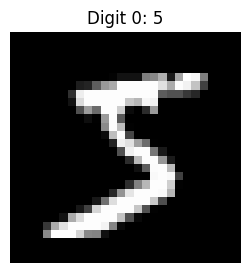

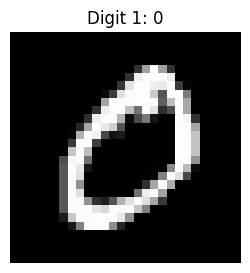

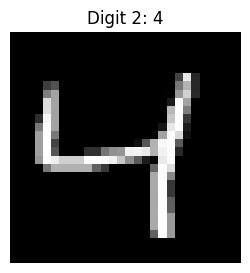

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Force numpy conversion
print("Loading MNIST with forced numpy conversion...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')

# Method 1: Use .values (most reliable)
X = np.array(mnist['data'])  # Force to numpy array
y = np.array(mnist['target'].astype(int))  # Force to numpy array

print(f"✓ X is numpy array: {isinstance(X, np.ndarray)}")
print(f"✓ y is numpy array: {isinstance(y, np.ndarray)}")

### START FUNCTION
def get_data(num_train_images, num_test_images):
    # Ensure we're working with numpy arrays
    global X, y
    
    # Extract and normalize
    X_train = X[:num_train_images].astype('float32') / 255.0
    y_train = y[:num_train_images]
    
    X_test = X[60000:60000 + num_test_images].astype('float32') / 255.0
    y_test = y[60000:60000 + num_test_images]
    
    return (X_train, y_train), (X_test, y_test)
### END FUNCTION

# Test it
(X_train, y_train), (X_test, y_test) = get_data(5000, 1000)

# Simple visualization test
print("\nQuick visualization test:")
for i in range(3):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Digit {i}: {y_train[i]}")
    plt.axis('off')
    plt.show()

## Challenge 2: Training the model

Now that we have formatted our data, we can fit a model using sklearn's `RandomForestClassifier` class with `20 estimators` and its `random_state` set to `42`. We'll write a function that will take as input the image and label variables that we created previously, and return a trained model.

_**Function specifications:**_
* Should take two NumPy `arrays` as input in the form `(X_train, y_train)`.
* Should return an sklearn `RandomForestClassifier` model which has a random state of 42 and number of estimators 20.
* The returned model should be fitted to the data.

In [ ]:
### START FUNCTION
def train_model(X_train, y_train):
    #your code here
    return 

### END FUNCTION

In [11]:
from sklearn.ensemble import RandomForestClassifier

### START FUNCTION
def train_model(X_train, y_train):
    """
    Train a Random Forest classifier on the MNIST data.
    
    Parameters:
    X_train (numpy.ndarray): Training images
    y_train (numpy.ndarray): Training labels
    
    Returns:
    RandomForestClassifier: Trained model with 20 estimators and random_state=42
    """
    # Create the Random Forest classifier with specified parameters
    clf = RandomForestClassifier(n_estimators=20, random_state=42)
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    return clf
### END FUNCTION

In [12]:
# First, make sure you have the data loaded (from Challenge 1)
# Using your get_data function
(X_train, y_train), (X_test, y_test) = get_data(5000, 1000)

# Now train the model
print("Training Random Forest classifier...")
clf = train_model(X_train, y_train)
print("✓ Model trained successfully!")

# Check the model
print(f"Model type: {type(clf)}")
print(f"Number of estimators: {clf.n_estimators}")
print(f"Random state: {clf.random_state}")
print(f"Classes learned: {clf.classes_}")

Training Random Forest classifier...
✓ Model trained successfully!
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Number of estimators: 20
Random state: 42
Classes learned: [0 1 2 3 4 5 6 7 8 9]


In [14]:
# Make predictions on the first 10 test images
predictions = clf.predict(X_test[:10])
actual = y_test[:10]

print("First 10 predictions vs actual:")
for i in range(10):
    print(f"  Image {i}: Predicted = {predictions[i]}, Actual = {actual[i]}")

# Calculate accuracy
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✓ Test accuracy: {accuracy:.2%}")

First 10 predictions vs actual:
  Image 0: Predicted = 7, Actual = 7
  Image 1: Predicted = 2, Actual = 2
  Image 2: Predicted = 1, Actual = 1
  Image 3: Predicted = 0, Actual = 0
  Image 4: Predicted = 4, Actual = 4
  Image 5: Predicted = 1, Actual = 1
  Image 6: Predicted = 4, Actual = 4
  Image 7: Predicted = 9, Actual = 9
  Image 8: Predicted = 4, Actual = 5
  Image 9: Predicted = 9, Actual = 9

✓ Test accuracy: 89.10%


In [13]:
clf = train_model(X_train, y_train)

## Challenge 3: Testing the model

Now that you have trained your model, let's see how well it does on the test set. Write a function which returns the accuracy of our trained model when tested with the test set.

_**Function specifications:**_
* Should take the fitted model `clf` and two NumPy arrays `X_test, y_test` as input.
* Should return a `float` of the accuracy of the model. This number should be between zero and one.

In [ ]:
### START FUNCTION
def calculate_accuracy(clf, X_test, y_test):
    #your code here
    return 

### END FUNCTION

In [15]:
from sklearn.metrics import accuracy_score

### START FUNCTION
def calculate_accuracy(clf, X_test, y_test):
    """
    Calculate the accuracy of a trained classifier on test data.
    
    Parameters:
    clf: Trained classifier (e.g., RandomForestClassifier)
    X_test (numpy.ndarray): Test images
    y_test (numpy.ndarray): True test labels
    
    Returns:
    float: Accuracy score between 0 and 1
    """
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy
### END FUNCTION

In [16]:
print(calculate_accuracy(clf,X_test,y_test))

0.891


In [17]:
from sklearn.metrics import classification_report

### START FUNCTION
def get_classification_report(clf, X_test, y_test):
    """
    Generate a classification report for the trained classifier.
    
    Parameters:
    clf: Trained classifier
    X_test (numpy.ndarray): Test images
    y_test (numpy.ndarray): True test labels
    
    Returns:
    str: Classification report as a formatted string
    """
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    return report
### END FUNCTION

In [18]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data (from Challenge 1)
def get_data(num_train_images, num_test_images):
    mnist = fetch_openml('mnist_784', version=1, parser='auto')
    X = mnist['data'].values
    y = mnist['target'].astype(int).values
    
    X_train = X[:num_train_images] / 255.0
    y_train = y[:num_train_images]
    X_test = X[60000:60000 + num_test_images] / 255.0
    y_test = y[60000:60000 + num_test_images]
    
    return (X_train, y_train), (X_test, y_test)

# Train model (from Challenge 2)
def train_model(X_train, y_train):
    clf = RandomForestClassifier(n_estimators=20, random_state=42)
    clf.fit(X_train, y_train)
    return clf

# Challenge 3 functions
def calculate_accuracy(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

def get_classification_report(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    return classification_report(y_test, y_pred)

# ====== RUN THE FULL PIPELINE ======
print("="*60)
print("CHALLENGE 3: Testing the Model")
print("="*60)

# 1. Get data
(X_train, y_train), (X_test, y_test) = get_data(5000, 1000)
print(f"Loaded {len(X_train)} training and {len(X_test)} test images")

# 2. Train model
clf = train_model(X_train, y_train)
print("✓ Model trained")

# 3. Calculate accuracy
accuracy = calculate_accuracy(clf, X_test, y_test)
print(f"✓ Test accuracy: {accuracy:.4f} ({accuracy:.2%})")

# 4. Get classification report
print("\n" + "="*60)
print("CLASSIFICATION REPORT:")
print("="*60)
report = get_classification_report(clf, X_test, y_test)
print(report)

CHALLENGE 3: Testing the Model
Loaded 5000 training and 1000 test images
✓ Model trained
✓ Test accuracy: 0.8910 (89.10%)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.98      0.98      0.98       126
           2       0.88      0.90      0.89       116
           3       0.84      0.83      0.84       107
           4       0.86      0.90      0.88       110
           5       0.86      0.85      0.86        87
           6       0.91      0.93      0.92        87
           7       0.88      0.85      0.87        99
           8       0.93      0.78      0.85        89
           9       0.81      0.88      0.85        94

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



Classification reports give us more information on where our model is going wrong – looking specifically at the performance caused by Type I and II errors. Write a function that returns the classification report of your test set.

_**Function specifications:**_
* Should take the fitted model `clf` and two NumPy arrays `X_test, y_test` as input.
* Should return a classification report.

In [ ]:
### START FUNCTION
def get_classification_report(clf, X_test, y_test):
    #your code here
    return

### END FUNCTION

In [20]:
print(get_classification_report(clf,X_test,y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.98      0.98      0.98       126
           2       0.88      0.90      0.89       116
           3       0.84      0.83      0.84       107
           4       0.86      0.90      0.88       110
           5       0.86      0.85      0.86        87
           6       0.91      0.93      0.92        87
           7       0.88      0.85      0.87        99
           8       0.93      0.78      0.85        89
           9       0.81      0.88      0.85        94

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



## Plotting the results

Let's actually see if our model has trained correctly. To do so, plot some of the images with their predicted labels. Since we don't have the predictions stored in our notebook's memory, we need to call the predict function here first.

Predicted Label:  5


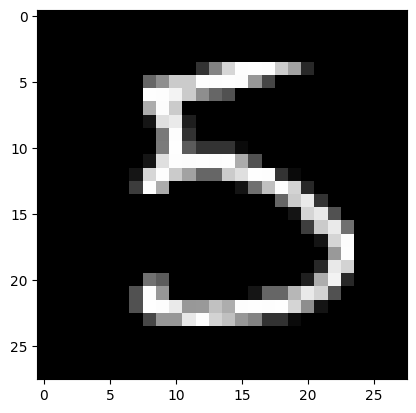

In [21]:
preds = clf.predict(X_test)

image_index = 15 ## Change me to see other predictions

print("Predicted Label: ",preds[image_index])
plt.imshow(X_test[image_index].reshape((28, 28)), cmap='gray')
plt.show()

Predicted Label: 5
Actual Label: 5


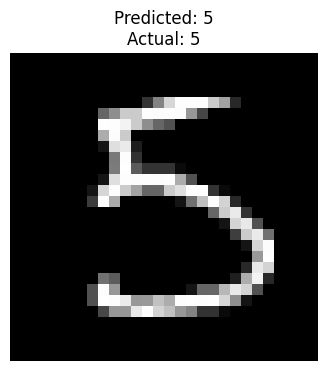

In [22]:
import matplotlib.pyplot as plt

# Make predictions on the test set
preds = clf.predict(X_test)

# Plot a single image with its predicted label
image_index = 15  # Change this to see different predictions

print(f"Predicted Label: {preds[image_index]}")
print(f"Actual Label: {y_test[image_index]}")

plt.figure(figsize=(4, 4))
plt.imshow(X_test[image_index].reshape((28, 28)), cmap='gray')
plt.title(f"Predicted: {preds[image_index]}\nActual: {y_test[image_index]}")
plt.axis('off')
plt.show()

Visualizing model predictions:


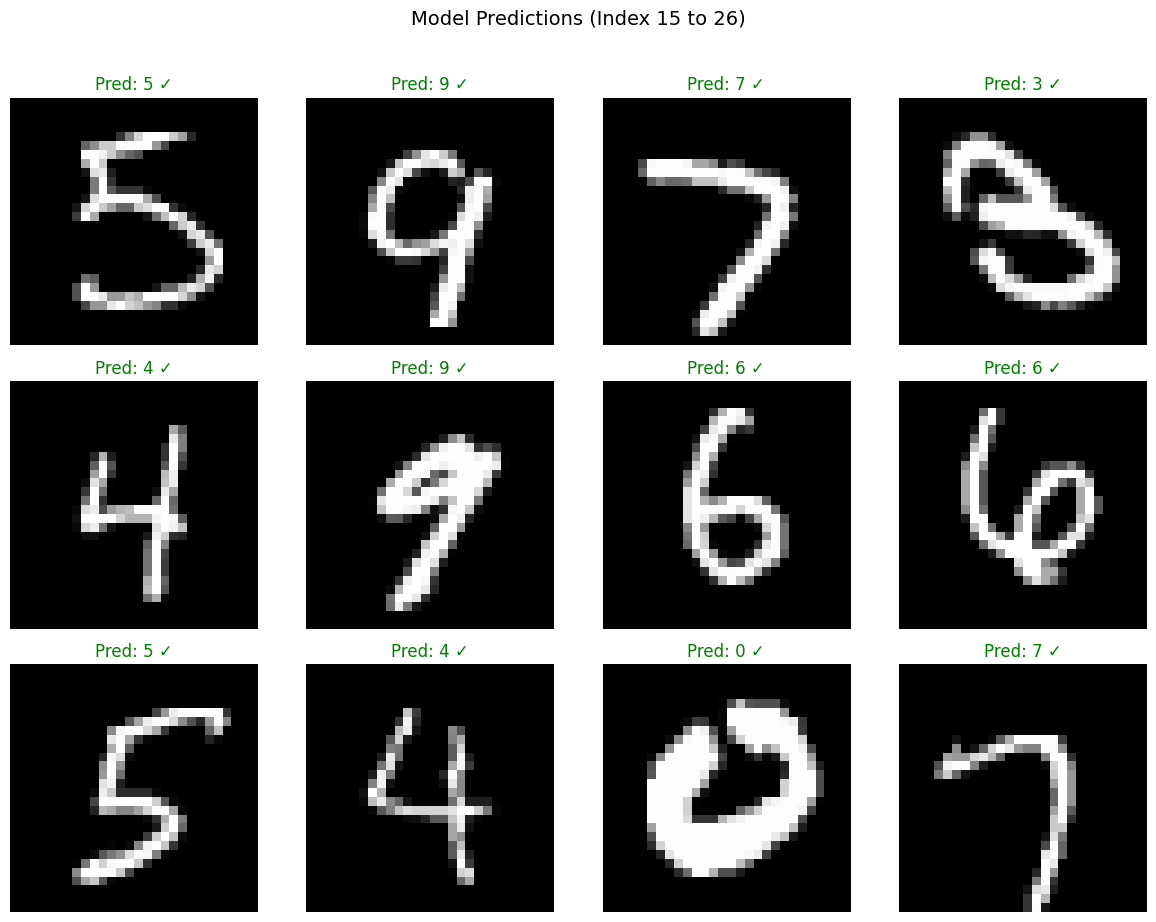

Accuracy on these 12 images: 100.0% (12/12)


In [23]:
def plot_predictions(clf, X_test, y_test, num_images=12, start_index=0):
    """
    Plot multiple test images with their predictions vs actual labels.
    
    Parameters:
    clf: Trained classifier
    X_test: Test images
    y_test: True labels
    num_images: Number of images to display
    start_index: Starting index in the test set
    """
    # Make predictions for the selected range
    preds = clf.predict(X_test[start_index:start_index + num_images])
    actuals = y_test[start_index:start_index + num_images]
    
    # Create subplots
    ncols = 4
    nrows = (num_images + ncols - 1) // ncols  # Ceiling division
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3*nrows))
    axes = axes.flat if nrows * ncols > 1 else [axes]
    
    for i, ax in enumerate(axes):
        if i < num_images:
            # Get current image
            img_idx = start_index + i
            img = X_test[img_idx].reshape(28, 28)
            
            # Display image
            ax.imshow(img, cmap='gray')
            
            # Set title with color coding
            pred = preds[i]
            actual = actuals[i]
            
            if pred == actual:
                ax.set_title(f"Pred: {pred} ✓", color='green')
            else:
                ax.set_title(f"Pred: {pred}\nActual: {actual} ✗", color='red')
            
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.suptitle(f"Model Predictions (Index {start_index} to {start_index + num_images - 1})", 
                 fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    correct = sum(preds == actuals)
    accuracy = correct / num_images
    print(f"Accuracy on these {num_images} images: {accuracy:.1%} ({correct}/{num_images})")

# Example usage
print("Visualizing model predictions:")
plot_predictions(clf, X_test, y_test, num_images=12, start_index=15)

Since we didn't use all the data in the beginning, there is a chance our performance can improve. Go change the amount of data we use to see how it affects the accuracy of your model.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>